In [1]:

import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data

In [2]:
# Path to FITRES file
fitres_file = 'BBC1D_fixgamma0.FITRES'

# Display the first few lines of the file to understand its structure
with open(fitres_file, 'r') as file:
    lines = file.readlines()
    for line in lines[:10]:  # Print the first 10 lines
        print(line)

# Reading the file
df1 = pd.read_csv(fitres_file, sep='\s+', comment='#')

# Display the DataFrame
print(df1.head())


# VERSION_PHOTOMETRY(DATA):     DES5YR_SMP 

# VERSION_PHOTOMETRY(BIASCOR):   

# ISDATA_REAL:   1 

# SNANA_VERSION: v11_05n-95-g0136620 

# BBC_VERSION:   4 



# MIGRAD

# NCALL_FCN: 4641 

# CPU: 0.03 minutes

# MU-RESIDUAL NOTE: MURES = MU-(MUMODEL+M0DIF) 

  VARNAMES:      CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  \
0       SN:  1562098  1562098        10     0    X2              3   
1       SN:  1702083  1702083        10     0    C2              3   
2       SN:  1435094  1435094        10     0    C3              3   
3       SN:  1309227  1309227        10     0    C3              3   
4       SN:  1324542  1324542        10     1    C2              3   

   ERRFLAG_FIT     zHEL  zHELERR  ...  CHI2  biasCor_nevt  biasCor_mu  \
0            0  0.57747    0.001  ...  1.71             0     -0.0512   
1            0  0.38932    0.001  ...  0.47             0     -0.0050   
2            0  1.01778    0.001  ...  2.42             0     -0.0697   
3            0  0.92649 

In [3]:
#dataframe 2 to extract the value of logOII
file_path2 = 'ozdes_oII.csv'

df2 = pd.read_csv(file_path2)

df2.head()

,CID,ID_Host,SPECZ,LOG_OII,LOG_OII_ERR,HOST_LOGMASS,HOST_LOGMASS_ERR,U-R
0,1644213,SVA1_COADD-2970925362,0.54622,0.534193,0.489119,10.46,0.04,1.29
1,1321492,SVA1_COADD-2971237980,0.55583,0.878993,0.558391,10.43,0.04,1.29
2,1896213,SVA1_COADD-2939364126,0.68757,0.744288,0.406872,11.08,0.03,1.49
3,1266255,SVA1_COADD-2939020332,0.29461,1.360995,0.308512,10.49,0.01,1.59
4,1279501,SVA1_COADD-2938843264,0.56655,1.072554,0.226491,10.26,0.04,1.17


In [4]:
#dataframe foundation 
#dataframe foundation 
file_path_fond1 = 'Foundation_Master_File.csv'
dff1 = pd.read_csv(file_path_fond1)
dff1_main= dff1[['mu_res_x1_c','SN','OII_EW','zHD', 'mu_err_x1_c']]
print(dff1_main)
# Drop rows where 'OII_EW' is NaN
dff1_main_non_nan = dff1_main.dropna(subset=['OII_EW'])
#find median redshift
redshift=dff1_main_non_nan['zHD']
med_redshift=np.median(redshift)
file_path_fond2 = 'FN_Host_Properties-3.csv'
dff2 = pd.read_csv(file_path_fond2)
dff2.head()

     mu_res_x1_c           SN    OII_EW      zHD  mu_err_x1_c
0       0.022315    SN2016coj       NaN  0.00570     0.482154
1      -0.024013       2018gv       NaN  0.00602     0.348138
2       0.278647       2019np       NaN  0.00648     0.320006
3      -0.103493      2017erp       NaN  0.00677     0.369122
4       0.010428  ASASSN-15so       NaN  0.00857     0.264834
..           ...          ...       ...      ...          ...
174     0.248538    Gaia16acv       NaN  0.07859     0.140942
175    -0.208416      PS15bzz  0.955859  0.07931     0.142165
176    -0.016114    SN2016glp       NaN  0.08410     0.218094
177    -0.093876    SN2016grz       NaN  0.08704     0.213306
178     0.130085     iPTF17dz       NaN  0.09293     0.491364

[179 rows x 5 columns]


,Unnamed: 0,Names,Redshift,SN_RA,SN_DEC,HOST_RA,HOST_DEC,LOGMASS,Color,HR,HR_err
0,0,SN2016coj,0.00570,182.028,65.1772,182.024310,65.174310,10.769,1.298282,0.019315,0.483672
1,1,2018gv,0.00602,121.394,-11.4379,121.408500,-11.427030,10.094,1.295473,-0.027013,0.350271
2,2,2019np,0.00648,157.342,29.5106,157.333080,29.491830,10.231,1.048933,0.275647,0.322304
3,3,2017erp,0.00677,227.312,-11.3342,227.317040,-11.321670,10.166,1.295473,-0.106493,0.371159
4,4,ASASSN-15so,0.00857,168.546,48.3187,168.545385,48.318615,10.632,1.048933,0.007428,0.267587


Extracting values from the data

In [5]:
#constant for hubble residuals
alpha= 0.15903
beta= 2.72633
M= -19.3755
#parameter extracted from dataframe 1 to compute hubble residuals
mB = df1['mB']
x1 = df1['x1']
c = df1['c']
biascorr= df1['biasCor_mu']
z= df1['zHD']

In [6]:
#compute hubble residuals
mu= mB - M - beta*c + alpha*x1 - biascorr
#add mu to dataframe 1
df1['mu'] = mu
print(mu)


0       42.834612
1       41.703459
2       43.609198
3       44.286162
4       42.553988
          ...    
1528    41.078388
1529    41.441194
1530    42.923195
1531    41.606410
1532    39.766587
Length: 1533, dtype: float64


In [7]:
#calculate theoretical distance modulus
cosmo = FlatLambdaCDM(H0=70, Om0=0.315, Tcmb0=2.72)
distance_modulus = np.zeros(len(z))
# Define the redshift of the object
for i in range(len(z)):
    distance_modulus[i] = cosmo.distmod(z[i]).value
distance_modulus


array([42.61962132, 41.60297068, 44.12601143, ..., 43.07075928,
       41.58976148, 39.89703132])

In [8]:
#compute hubble residuals
delta_mu= mu- (distance_modulus + df1['M0DIF'])
#add to dataframe 1
df1['delta_mu'] = delta_mu
delta_mu

0       0.239491
1       0.104988
2      -0.534813
3       0.393173
4       0.120924
          ...   
1528    0.012825
1529   -0.432509
1530   -0.150064
1531    0.021148
1532   -0.169344
Length: 1533, dtype: float64

In [9]:
#additional: evaluating the difference of distance modulus calculated by me and from marcus data
mures= df1['MURES']
difference_data= abs(delta_mu-mures)
print('the difference of distance modulus calculated by me and marcus data:', difference_data)


the difference of distance modulus calculated by me and marcus data: 0       0.001891
1       0.000888
2       0.000987
3       0.000973
4       0.000824
          ...   
1528    0.001525
1529    0.001891
1530    0.001936
1531    0.001748
1532    0.000856
Length: 1533, dtype: float64


In [10]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
#merge df1 and df2 based on CID
#df_merged is final dataset
df_merged = df1.merge(df2[['CID','LOG_OII', 'LOG_OII_ERR','SPECZ']], on='CID')
#display variable from dataframe1
for col in df_merged.columns:
    print(col)
#i have 3 candidates for redshift, SPECZ, zHD, and zHEL
print(df_merged['SPECZ'])
print(df_merged['zHD'])

VARNAMES:
CID
CIDint
IDSURVEY
TYPE
FIELD
CUTFLAG_SNANA
ERRFLAG_FIT
zHEL
zHELERR
zCMB
zCMBERR
zHD
zHDERR
VPEC
VPECERR
MWEBV
HOST_NMATCH
HOST_NMATCH2
HOST_OBJID
HOST_ZPHOT
HOST_ZPHOTERR
HOST_ZSPEC
HOST_ZSPECERR
HOST_RA
HOST_DEC
HOST_ANGSEP
HOST_DDLR
HOST_CONFUSION
HOST_LOGMASS
HOST_LOGMASS_ERR
HOST_SBFLUXCAL_g
HOST_SBFLUXCAL_r
HOST_SBFLUXCAL_i
HOST_SBFLUXCAL_z
HOST_SBMAG_g
HOST_SBMAG_r
HOST_SBMAG_i
HOST_SBMAG_z
PKMJDINI
SNRMAX1
SNRMAX2
SNRMAX3
PKMJD
PKMJDERR
x1
x1ERR
c
cERR
mB
mBERR
x0
x0ERR
COV_x1_c
COV_x1_x0
COV_c_x0
NDOF
FITCHI2
FITPROB
RA
DEC
HOST_ANGSEP_2
TGAPMAX
TrestMIN
TrestMAX
FLUXCALMAX_g
SNRMAX_g
FLUXCALMAX_r
SNRMAX_r
FLUXCALMAX_i
SNRMAX_i
FLUXCALMAX_z
SNRMAX_z
HOSTGAL_LOGMASS
HOSTGAL_LOGMASS_ERR
HOST_LOGSFR
HOST_LOGSFR_ERR
HOST_LOGsSFR
HOST_COLOR
HOST_LOGsSFR_ERR
HOST_COLOR_ERR
PROB_SCONE
PROB_SNIRFV19
PROB_SNNDESCC
PROB_SNNJ17
PROB_SNNV19
PROB_UNITY
CUTMASK
MU
MUMODEL
MUERR
MUERR_RENORM
MUERR_RAW
MUERR_VPEC
MURES
MUPULL
M0DIF
M0DIFERR
CHI2
biasCor_nevt
biasCor_mu
biasCorErr_

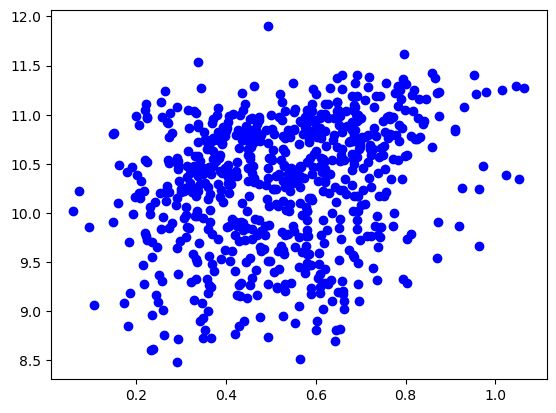

In [11]:
plt.scatter(df_merged['zHD'], df_merged['HOST_LOGMASS'], c='blue', label='Data Points')

# Define function

In [11]:
#function:compute weighted average
def weighted_average(values, errors):
    """
    Calculate the weighted average of a list of values, where the weights are 1/(error^2).

    :param values: List of numerical values.
    :param errors: List of errors corresponding to the values.
    :return: The weighted average.
    """
    if len(values) != len(errors):
        raise ValueError("Values and errors must be of the same length.")
    
    # Calculate weights as 1/(error^2)
    weights = [1 / (error**2) for error in errors]
    
    weighted_sum = sum(value * weight for value, weight in zip(values, weights))
    total_weight = sum(weights)
    
    return weighted_sum / total_weight


#function: bootstrap resampling to compute the uncertainty
def create_bootstrap_samples_weighted(df, value_column, weight_column, sample_size=None, n_samples=1000):
    # If no sample_size is provided, use the entire DataFrame's length
    if sample_size is None:
        sample_size = len(df)
    
    # Create a list for sample weighted averages
    sample_weighted_averages = []
    
    # Loop n_samples times
    for _ in range(n_samples):
        # Create a bootstrap sample of sample_size with replacement
        bootstrap_sample = df.sample(n=sample_size, replace=True)
        
        # Extract the values and weights from the bootstrap sample
        values = bootstrap_sample[value_column]
        weights = 1 / (bootstrap_sample[weight_column] ** 2)
        
        # Calculate the weighted average for the bootstrap sample
        weighted_average = np.average(values, weights=weights)
        
        # Add this weighted average to the list
        sample_weighted_averages.append(weighted_average)
    
    return pd.Series(sample_weighted_averages)

def intrinsic_error(error):
    sample_size = len(error)
    # Create a list for intrinsic error
    intrin_error = []
    # Loop over sample_size times
    for i in range(sample_size):
        weight = 1 / (error[i] ** 2)  # Calculate the weight for each error
        intrin_error.append(weight)   # Append each weight to the list
    
    # Calculate the final intrinsic error
    total_error = 1 / np.sqrt(sum(intrin_error))
    return total_error


# HUBBLE RESIDUALS VS MASS

In [12]:
#find median of [HOST_MASS]
mass= df_merged['HOST_LOGMASS']
#med_mass= np.median(mass)
med_mass=10

#split data into two
mass_below_median = df_merged[mass <= med_mass]
mass_above_median = df_merged[mass > med_mass]
mass_below_median

#weighted average for below median 
mass_values_bm = mass_below_median['delta_mu']
mass_weights_bm = mass_below_median['MUERR']
mass_wa_bm = weighted_average(mass_values_bm, mass_weights_bm)
print(f"(MASS) The weighted average below median is: {mass_wa_bm}")
#weighted average for above median
mass_values_am = mass_above_median['delta_mu']
mass_weights_am = mass_above_median['MUERR']
mass_wa_am = weighted_average(mass_values_am, mass_weights_am)
print(f"(MASS) The weighted average above median is: {mass_wa_am}")

#uncertainty for below median
mass_bootstrap_bm = create_bootstrap_samples_weighted(mass_below_median, 'delta_mu', 'MUERR')
mass_std_bm= np.std(mass_bootstrap_bm)
print("(MASS) uncertainty for below median data:", mass_std_bm)
#uncertainty for above median
mass_bootstrap_am = create_bootstrap_samples_weighted(mass_above_median, 'delta_mu', 'MUERR')
mass_std_am= np.std(mass_bootstrap_am)
print("(MASS) uncertainty for above median data:", mass_std_am)

#find corresponding x axis (median)
massx_bm=mass_below_median['HOST_LOGMASS']
mass_x_bm= np.median(massx_bm)
massx_am=mass_above_median['HOST_LOGMASS']
mass_x_am= np.median(massx_am)

#extract axis for plot
#y axis for plot
dmu=df_merged['delta_mu']
#x axis for plot
mass

#calculate the difference of hubble residuals
mass_step= abs(mass_wa_am -mass_wa_bm)
mass_step_err= np.sqrt((mass_std_am)**2 + (mass_std_bm)**2)
print("(MASS) hubble residual diff:", mass_step)
print("(MASS) the error of hubble residual diff:", mass_step_err)
print(med_mass)


(MASS) The weighted average below median is: 0.041811548455909904
(MASS) The weighted average above median is: -0.021409609919335375
(MASS) uncertainty for below median data: 0.011219110436779063
(MASS) uncertainty for above median data: 0.007417338667010608
(MASS) hubble residual diff: 0.06322115837524528
(MASS) the error of hubble residual diff: 0.013449362508824558
10


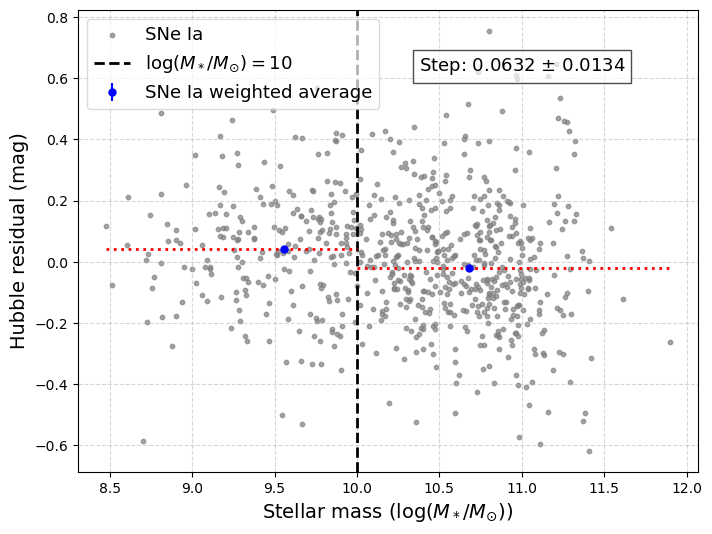

In [32]:
plt.figure(figsize=(8, 6))

# Scatter plot for the data points
plt.scatter(mass, dmu, s=10, color='gray', alpha=0.7, label='SNe Ia')

# Labels and titles
plt.xlabel(r'Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=14)
plt.ylabel(r'Hubble residual (mag)', fontsize=14)
#plt.title(r'Hubble residuals vs Mass', fontsize=14)

# Add the vertical and horizontal lines
plt.axvline(x=med_mass, color='black', linestyle='--', lw=2, label='$\log(M_*/M_{\odot}) = 10$')
plt.hlines(mass_wa_bm, xmin=mass.min(), xmax=med_mass, color='red', linestyle=':', lw=2)  # Left side
plt.hlines(mass_wa_am, xmin=med_mass, xmax=mass.max(), color='red', linestyle=':', lw=2)  # Right side

# Add error bars for weighted averages
plt.errorbar(mass_x_bm, mass_wa_bm, yerr=mass_std_bm, fmt='o', color='blue', markersize=5, label='SNe Ia weighted average')
plt.errorbar(mass_x_am, mass_wa_am, yerr=mass_std_am, fmt='o', color='blue', markersize=5)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusted legend style: Only one entry for weighted average w/ error
plt.legend(loc='upper left', fontsize=13, frameon=True, fancybox=True, framealpha=0.7)

# Add custom text annotation for the step
plt.text(0.55, 0.9, rf'Step: {mass_step:.4f} $\pm$ {mass_step_err:.4f}', 
         transform=plt.gca().transAxes, fontsize=13, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Save plot as a PNG file (overwrite if exists)
file_path1 = 'hubble_residuals_vs_mass.png'
if os.path.isfile(file_path1):
    os.remove(file_path1)
plt.savefig(file_path1, dpi=300)

# Display the plot
plt.show()

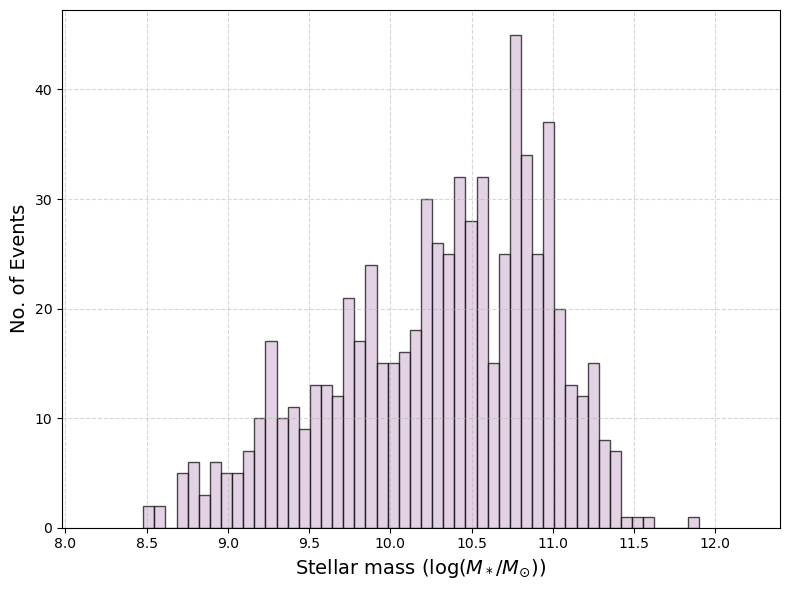

In [14]:
# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(mass, bins=50, edgecolor='black', alpha=0.7, color='thistle')

# Set x-axis limits if needed
plt.xlim(np.min(mass) - 0.5, np.max(mass) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
plt.show()

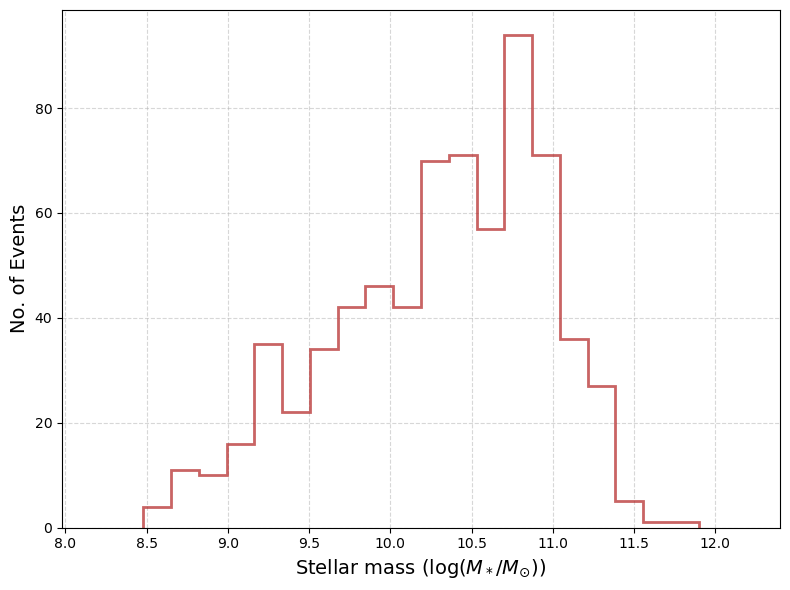

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram as a line (outline only)
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(mass, bins=20, edgecolor='firebrick', alpha=0.7, color='thistle', histtype='step', linewidth=2)

# Set x-axis limits if needed
plt.xlim(np.min(mass) - 0.5, np.max(mass) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
plt.show()


# EVALUATING DATA FOR DIFFERENCE dDLR

In [16]:

#splitting data based on dDLR value
dDLR= df_merged['HOST_DDLR']
dDLR_lt1= df_merged[dDLR < 1]
dDLR_gt1= df_merged[dDLR >= 1]
print(len(dDLR))
print(len(dDLR_lt1))
print(len(dDLR_gt1))

695
467
228


dDLR<1

In [17]:


#find median of [mass]
mass_dDLR_lt1= dDLR_lt1['HOST_LOGMASS']
med_mass_dDLR_lt1= med_mass

#split data into two
mass_dDLR_lt1_bm = dDLR_lt1[mass_dDLR_lt1 <= med_mass]
mass_dDLR_lt1_am = dDLR_lt1[mass_dDLR_lt1 > med_mass]

#extract axis for plot
#y axis for plot
dmu_dDLR_lt1= dDLR_lt1['delta_mu']
#x axis for plot
mass_dDLR_lt1
print(mass_dDLR_lt1)
#weighted average for below median 
mass_values_bm_dDLR_lt1 = mass_dDLR_lt1_bm['delta_mu']
mass_weights_bm_dDLR_lt1 = mass_dDLR_lt1_bm['MUERR']
mass_wa_bm_dDLR_lt1 = weighted_average(mass_values_bm_dDLR_lt1, mass_weights_bm_dDLR_lt1)
print(f"(MASS) The weighted average below median for dDLR<1 is: {mass_wa_bm_dDLR_lt1}")
#weighted average for above median
mass_values_am_dDLR_lt1 = mass_dDLR_lt1_am['delta_mu']
mass_weights_am_dDLR_lt1 = mass_dDLR_lt1_am['MUERR']
mass_wa_am_dDLR_lt1 = weighted_average(mass_values_am_dDLR_lt1, mass_weights_am_dDLR_lt1)
print(f"(MASS) The weighted average above median for dDLR<1 is: {mass_wa_am_dDLR_lt1}")

#uncertainty for below median
mass_bootstrap_bm_dDLR_lt1 = create_bootstrap_samples_weighted(mass_dDLR_lt1_bm, 'delta_mu', 'MUERR')
mass_std_bm_dDLR_lt1= np.std(mass_bootstrap_bm_dDLR_lt1)
print("(MASS) uncertainty for below median for dDLR<1 data:", mass_std_bm_dDLR_lt1)
#uncertainty for above median
mass_bootstrap_am_dDLR_lt1 = create_bootstrap_samples_weighted(mass_dDLR_lt1_am, 'delta_mu', 'MUERR')
mass_std_am_dDLR_lt1= np.std(mass_bootstrap_am_dDLR_lt1)
print("(MASS) uncertainty for above median for dDLR<1 data:", mass_std_am_dDLR_lt1)

#find corresponding x axis (median)
massmed_bm_dDLR_lt1=mass_dDLR_lt1_bm['HOST_LOGMASS']
mass_x_bm_dDLR_lt1= np.median(massmed_bm_dDLR_lt1)
massmed_am_dDLR_lt1=mass_dDLR_lt1_am['HOST_LOGMASS']
mass_x_am_dDLR_lt1= np.median(massmed_am_dDLR_lt1)

#calculate the difference of hubble residuals
mass_step_dDLR_lt1= abs(mass_wa_bm_dDLR_lt1 - mass_wa_am_dDLR_lt1)
mass_step_err_dDLR_lt1= np.sqrt((mass_std_am_dDLR_lt1)**2 + (mass_std_bm_dDLR_lt1)**2)
print("(MASS) HUBBLE RESIDUAL DIFF FOR dDLR<1:", mass_step_dDLR_lt1)
print("(MASS) the error of hubble residual diff for dDLR<1:", mass_step_err_dDLR_lt1)


1       9.528
2      10.254
3      10.379
5      11.284
6      10.785
        ...  
688    10.355
689    10.858
690     9.109
691    10.246
693    10.791
Name: HOST_LOGMASS, Length: 467, dtype: float64
(MASS) The weighted average below median for dDLR<1 is: 0.05439385934717825
(MASS) The weighted average above median for dDLR<1 is: -0.02754973304475087
(MASS) uncertainty for below median for dDLR<1 data: 0.014355657210366796
(MASS) uncertainty for above median for dDLR<1 data: 0.010128488798352372
(MASS) HUBBLE RESIDUAL DIFF FOR dDLR<1: 0.08194359239192911
(MASS) the error of hubble residual diff for dDLR<1: 0.01756904036309057


dDLR>1

In [18]:
#find median 
mass_dDLR_gt1= dDLR_gt1['HOST_LOGMASS']
med_mass_dDLR_gt1= med_mass

#split data into two
mass_dDLR_gt1_bm = dDLR_gt1[mass_dDLR_gt1 <= med_mass]
mass_dDLR_gt1_am = dDLR_gt1[mass_dDLR_gt1 > med_mass]

#extract axis for plot
#y axis for plot
dmu_dDLR_gt1= dDLR_gt1['delta_mu']
#x axis for plot
mass_dDLR_gt1= dDLR_gt1['HOST_LOGMASS']

#weighted average for below median 
mass_values_bm_dDLR_gt1 = mass_dDLR_gt1_bm['delta_mu']
mass_weights_bm_dDLR_gt1 = mass_dDLR_gt1_bm['MUERR']
mass_wa_bm_dDLR_gt1 = weighted_average(mass_values_bm_dDLR_gt1, mass_weights_bm_dDLR_gt1)
print(f"(MASS) The weighted average below median for dDLR>1 is: {mass_wa_bm_dDLR_gt1}")
#weighted average for above median
mass_values_am_dDLR_gt1 = mass_dDLR_gt1_am['delta_mu']
mass_weights_am_dDLR_gt1 = mass_dDLR_gt1_am['MUERR']
mass_wa_am_dDLR_gt1 = weighted_average(mass_values_am_dDLR_gt1, mass_weights_am_dDLR_gt1)
print(f"(MASS) The weighted average above median for dDLR >1 is: {mass_wa_am_dDLR_gt1}")

#uncertainty for below median
mass_bootstrap_bm_dDLR_gt1 = create_bootstrap_samples_weighted(mass_dDLR_gt1_bm, 'delta_mu', 'MUERR')
mass_std_bm_dDLR_gt1= np.std(mass_bootstrap_bm_dDLR_gt1)
print("(MASS) uncertainty for below median for dDLR>1 data:", mass_std_bm_dDLR_gt1)
#uncertainty for above median
mass_bootstrap_am_dDLR_gt1 = create_bootstrap_samples_weighted(mass_dDLR_gt1_am, 'delta_mu', 'MUERR')
mass_std_am_dDLR_gt1= np.std(mass_bootstrap_am_dDLR_gt1)
print("(MASS) uncertainty for above median for dDLR>1 data:", mass_std_am_dDLR_gt1)

#find corresponding x axis (median)
massmed_bm_dDLR_gt1=mass_dDLR_gt1_bm['HOST_LOGMASS']
mass_x_bm_dDLR_gt1= np.median(massmed_bm_dDLR_gt1)
massmed_am_dDLR_gt1=mass_dDLR_gt1_am['HOST_LOGMASS']
mass_x_am_dDLR_gt1= np.median(massmed_am_dDLR_gt1)

#calculate the difference of hubble residuals
mass_step_dDLR_gt1= abs(mass_wa_am_dDLR_gt1 - mass_wa_bm_dDLR_gt1)
mass_step_err_dDLR_gt1= np.sqrt((mass_std_am_dDLR_gt1)**2 + (mass_std_bm_dDLR_gt1)**2)
print("(MASS) HUBBLE RESIDUAL DIFF FOR dDLR>1:", mass_step_dDLR_gt1)
print("(MASS) the error of hubble residual diff for dDLR>1:", mass_step_err_dDLR_gt1)




(MASS) The weighted average below median for dDLR>1 is: 0.021474514799441412
(MASS) The weighted average above median for dDLR >1 is: -0.009704453026352524
(MASS) uncertainty for below median for dDLR>1 data: 0.01481022561062531
(MASS) uncertainty for above median for dDLR>1 data: 0.012090723429352076
(MASS) HUBBLE RESIDUAL DIFF FOR dDLR>1: 0.031178967825793935
(MASS) the error of hubble residual diff for dDLR>1: 0.01911879639733383


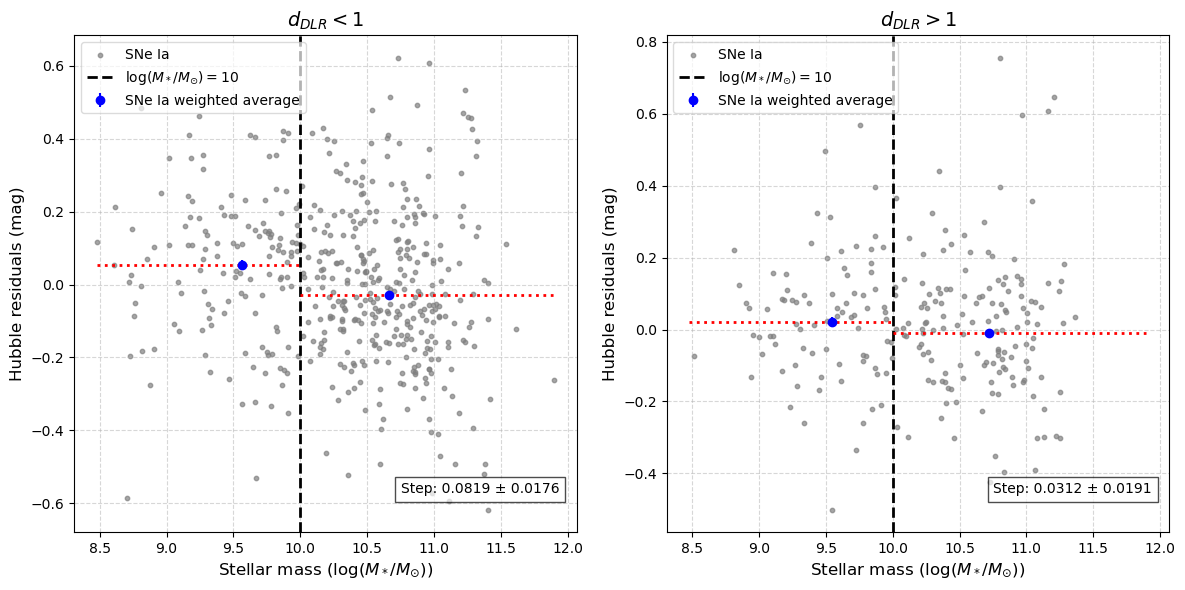

In [19]:
# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot for dDLR < 1
ax1.scatter(mass_dDLR_lt1, dmu_dDLR_lt1, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax1.set_xlabel('Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=12)
ax1.set_ylabel('Hubble residuals (mag)', fontsize=12)
ax1.axvline(x=med_mass, color='black', linestyle='--', lw=2, label='$\log(M_*/M_{\odot}) = 10$')
ax1.grid(True, linestyle='--', alpha=0.5)
# Error bars for weighted averages
ax1.errorbar(mass_x_bm_dDLR_lt1, mass_wa_bm_dDLR_lt1, yerr=mass_std_bm_dDLR_lt1, fmt='o', color='blue', label='SNe Ia weighted average')
ax1.errorbar(mass_x_am_dDLR_lt1, mass_wa_am_dDLR_lt1, yerr=mass_std_am_dDLR_lt1, fmt='o', color='blue')

# Horizontal line for the weighted average
ax1.hlines(mass_wa_bm_dDLR_lt1, xmin=mass.min(), xmax=med_mass, color='red', linestyle=':', lw=2)
ax1.hlines(mass_wa_am_dDLR_lt1, xmin=med_mass, xmax=mass.max(), color='red', linestyle=':', lw=2)

ax1.set_title('$d_{DLR} < 1$', fontsize=14)
ax1.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax1.text(0.65, 0.1, f'Step: {mass_step_dDLR_lt1:.4f} ± {mass_step_err_dDLR_lt1:.4f}', 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Second subplot for dDLR > 1
ax2.scatter(mass_dDLR_gt1, dmu_dDLR_gt1, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax2.set_xlabel('Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=12)
ax2.set_ylabel('Hubble residuals (mag)', fontsize=12)
ax2.axvline(x=med_mass, color='black', linestyle='--', lw=2, label='$\log(M_*/M_{\odot}) = 10$')

# Error bars for weighted averages
ax2.errorbar(mass_x_bm_dDLR_gt1, mass_wa_bm_dDLR_gt1, yerr=mass_std_bm_dDLR_gt1, fmt='o', color='blue', label='SNe Ia weighted average')
ax2.errorbar(mass_x_am_dDLR_gt1, mass_wa_am_dDLR_gt1, yerr=mass_std_am_dDLR_gt1, fmt='o', color='blue')
ax2.grid(True, linestyle='--', alpha=0.5)
# Horizontal line for the weighted average
ax2.hlines(mass_wa_bm_dDLR_gt1, xmin=mass.min(), xmax=med_mass, color='red', linestyle=':', lw=2)
ax2.hlines(mass_wa_am_dDLR_gt1, xmin=med_mass, xmax=mass.max(), color='red', linestyle=':', lw=2)

ax2.set_title('$d_{DLR} > 1$', fontsize=14)
ax2.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax2.text(0.65, 0.1, f'Step: {mass_step_dDLR_gt1:.4f} ± {mass_step_err_dDLR_gt1:.4f}', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure as a PNG file
file_path_combined_mass = 'hubble_residuals_vs_mass_combined.png'
if os.path.isfile(file_path_combined_mass):
    os.remove(file_path_combined_mass)
plt.savefig(file_path_combined_mass, dpi=300)

# Show the plot
plt.show()

In [20]:
sigma_ddlr= (mass_step_dDLR_lt1 - mass_step_dDLR_gt1)/np.sqrt(mass_step_err_dDLR_gt1**2 + mass_step_err_dDLR_lt1**2)
print(sigma_ddlr)

1.9550908713161


# EVALUATING DATA FOR DIFFERENCE REDSHIFT

In [21]:
#splitting data based on redshift value
z= df_merged['SPECZ']
med_z= np.median(z)
z_ltm= df_merged[z < med_z]
z_gtm= df_merged[z >= med_z]
z_gtm['SPECZ']
print(len(z))
print(len(z_ltm))
print(len(z_gtm))

695
347
348


z<median

In [22]:
#find median of [OII]
mass_z_ltm= z_ltm['HOST_LOGMASS']
med_mass_z_ltm= med_mass

#split data into two
mass_z_ltm_bm = z_ltm[mass_z_ltm <= med_mass]
mass_z_ltm_am = z_ltm[mass_z_ltm > med_mass]
mass_z_ltm_bm

#y axis for plot
dmu_z_ltm= z_ltm['delta_mu']
#x axis for plot
mass_z_ltm= z_ltm['HOST_LOGMASS']

#weighted average for below median 
mass_values_bm_z_ltm = mass_z_ltm_bm['delta_mu']
mass_weights_bm_z_ltm = mass_z_ltm_bm['MUERR']
mass_wa_bm_z_ltm = weighted_average(mass_values_bm_z_ltm, mass_weights_bm_z_ltm)
print(f"[MASS] The weighted average below median for z<med_z is: {mass_wa_bm_z_ltm}")
#weighted average for above median
mass_values_am_z_ltm = mass_z_ltm_am['delta_mu']
mass_weights_am_z_ltm = mass_z_ltm_am['MUERR']
mass_wa_am_z_ltm = weighted_average(mass_values_am_z_ltm, mass_weights_am_z_ltm)
print(f"[MASS] The weighted average above median for z<med_z is: {mass_wa_am_z_ltm}")

#uncertainty for below median
mass_bootstrap_bm_z_ltm = create_bootstrap_samples_weighted(mass_z_ltm_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_ltm= np.std(mass_bootstrap_bm_z_ltm)
print("[MASS] uncertainty for below median for z<med_z data:", mass_std_bm_z_ltm)
#uncertainty for above median
mass_bootstrap_am_z_ltm = create_bootstrap_samples_weighted(mass_z_ltm_am, 'delta_mu', 'MUERR')
mass_std_am_z_ltm= np.std(mass_bootstrap_am_z_ltm)
print("[MASS] uncertainty for above median for z<med_z data:", mass_std_am_z_ltm)

#find corresponding x axis (median)
massmed_bm_z_ltm=mass_z_ltm_bm['HOST_LOGMASS']
mass_x_bm_z_ltm= np.median(massmed_bm_z_ltm)
massmed_am_z_ltm=mass_z_ltm_am['HOST_LOGMASS']
mass_x_am_z_ltm= np.median(massmed_am_z_ltm)
print(mass_x_am_z_ltm)

#calculate the difference of hubble residuals
mass_step_z_ltm= abs(mass_wa_bm_z_ltm - mass_wa_am_z_ltm)
mass_step_err_z_ltm= np.sqrt((mass_std_am_z_ltm)**2 + (mass_std_bm_z_ltm)**2)
print("[MASS] hubble residual diff for z<med_z:", mass_step_z_ltm)
print("[MASS] the error of hubble residual diff for z<med_z:", mass_step_err_z_ltm)





[MASS] The weighted average below median for z<med_z is: 0.051827709293748345
[MASS] The weighted average above median for z<med_z is: -0.027544614337256818
[MASS] uncertainty for below median for z<med_z data: 0.01286400802357847
[MASS] uncertainty for above median for z<med_z data: 0.009146265955540543
10.547
[MASS] hubble residual diff for z<med_z: 0.07937232363100516
[MASS] the error of hubble residual diff for z<med_z: 0.01578407055737433


z>median

In [23]:
#find median of [OII]
mass_z_gtm= z_gtm['HOST_LOGMASS']
med_mass_z_gtm= med_mass

#split data into two
mass_z_gtm_bm = z_gtm[mass_z_gtm <= med_mass]
mass_z_gtm_am = z_gtm[mass_z_gtm > med_mass]

#extract axis for plot
#y axis for plot
dmu_z_gtm= z_gtm['delta_mu']
#x axis for plot
mass_z_gtm= z_gtm['HOST_LOGMASS']

#weighted average for below median 
mass_values_bm_z_gtm = mass_z_gtm_bm['delta_mu']
mass_weights_bm_z_gtm = mass_z_gtm_bm['MUERR']
mass_wa_bm_z_gtm = weighted_average(mass_values_bm_z_gtm, mass_weights_bm_z_gtm)
print(f"[MASS] The weighted average below median for z>med_z is: {mass_wa_bm_z_gtm}")
#weighted average for above median
mass_values_am_z_gtm = mass_z_gtm_am['delta_mu']
mass_weights_am_z_gtm = mass_z_gtm_am['MUERR']
mass_wa_am_z_gtm = weighted_average(mass_values_am_z_gtm, mass_weights_am_z_gtm)
print(f"[MASS] The weighted average above median for z>med_z is: {mass_wa_am_z_gtm}")

#uncertainty for below median
mass_bootstrap_bm_z_gtm = create_bootstrap_samples_weighted(mass_z_gtm_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_gtm= np.std(mass_bootstrap_bm_z_gtm)
print("[MASS] uncertainty for below median for z>med_z data:", mass_std_bm_z_gtm)
#uncertainty for above median
mass_bootstrap_am_z_gtm = create_bootstrap_samples_weighted(mass_z_gtm_am, 'delta_mu', 'MUERR')
mass_std_am_z_gtm= np.std(mass_bootstrap_am_z_gtm)
print("[MASS] uncertainty for above median for z>med_z data:", mass_std_am_z_gtm)

#find corresponding x axis (median)
massmed_bm_z_gtm=mass_z_gtm_bm['HOST_LOGMASS']
mass_x_bm_z_gtm= np.median(massmed_bm_z_gtm)
massmed_am_z_gtm=mass_z_gtm_am['HOST_LOGMASS']
mass_x_am_z_gtm= np.median(massmed_am_z_gtm)

#calculate the difference of hubble residuals
mass_step_z_gtm= abs(mass_wa_bm_z_gtm - mass_wa_am_z_gtm)
mass_step_err_z_gtm= np.sqrt((mass_std_am_z_gtm)**2 + (mass_std_bm_z_gtm)**2)
print("[MASS] hubble residual diff for z>med_z:", mass_step_z_gtm)
print("[MASS] the error of hubble residual diff for z>med_z:", mass_step_err_z_gtm)



[MASS] The weighted average below median for z>med_z is: 0.013183274837945996
[MASS] The weighted average above median for z>med_z is: -0.009789454374310395
[MASS] uncertainty for below median for z>med_z data: 0.022021489333995684
[MASS] uncertainty for above median for z>med_z data: 0.013443831085354447
[MASS] hubble residual diff for z>med_z: 0.02297272921225639
[MASS] the error of hubble residual diff for z>med_z: 0.025800825311195538


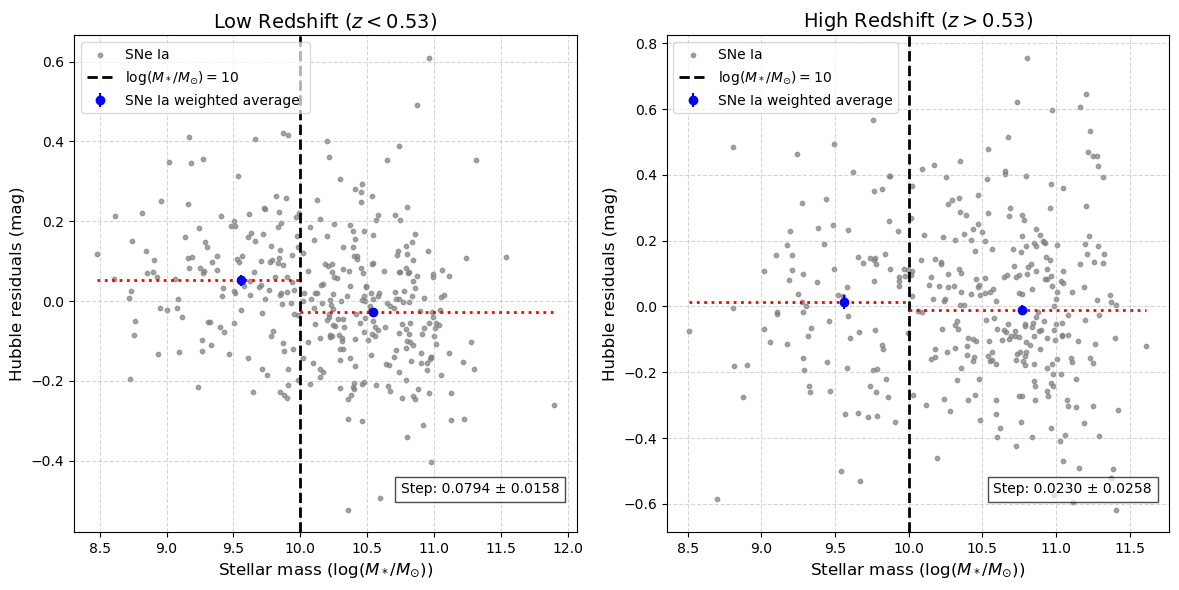

In [24]:
# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot for low redshift
ax1.scatter(mass_z_ltm, dmu_z_ltm, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax1.set_xlabel('Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=12)
ax1.set_ylabel('Hubble residuals (mag)', fontsize=12)
ax1.axvline(x=med_mass, color='black', linestyle='--', lw=2, label='$\log(M_*/M_{\odot}) = 10$')

# Error bars for weighted averages
ax1.errorbar(mass_x_bm_z_ltm, mass_wa_bm_z_ltm, yerr=mass_std_bm_z_ltm, fmt='o', color='blue', label='SNe Ia weighted average ')
ax1.errorbar(mass_x_am_z_ltm, mass_wa_am_z_ltm, yerr=mass_std_am_z_ltm, fmt='o', color='blue')
ax1.grid(True, linestyle='--', alpha=0.5)
# Horizontal line for the weighted average
ax1.hlines(mass_wa_bm_z_ltm, xmin=mass_z_ltm.min(), xmax=med_mass, color='red', linestyle=':', lw=2)
ax1.hlines(mass_wa_am_z_ltm, xmin=med_mass, xmax=mass_z_ltm.max(), color='red', linestyle=':', lw=2)

ax1.set_title('Low Redshift $(z < 0.53)$', fontsize=14)
ax1.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax1.text(0.65, 0.1, f'Step: {mass_step_z_ltm:.4f} ± {mass_step_err_z_ltm:.4f}', 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Second subplot for high redshift
ax2.scatter(mass_z_gtm, dmu_z_gtm, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax2.set_xlabel('Stellar mass ($\log(M_*/M_{\odot})$)', fontsize=12)
ax2.set_ylabel('Hubble residuals (mag)', fontsize=12)
ax2.axvline(x=med_mass, color='black', linestyle='--', lw=2, label='$\log(M_*/M_{\odot}) = 10$')

# Error bars for weighted averages
ax2.errorbar(mass_x_bm_z_gtm, mass_wa_bm_z_gtm, yerr=mass_std_bm_z_gtm, fmt='o', color='blue', label='SNe Ia weighted average')
ax2.errorbar(mass_x_am_z_gtm, mass_wa_am_z_gtm, yerr=mass_std_am_z_gtm, fmt='o', color='blue')

# Horizontal line for the weighted average
ax2.hlines(mass_wa_bm_z_gtm, xmin=mass_z_gtm.min(), xmax=med_mass, color='red', linestyle=':', lw=2)
ax2.hlines(mass_wa_am_z_gtm, xmin=med_mass, xmax=mass_z_gtm.max(), color='red', linestyle=':', lw=2)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_title('High Redshift $(z > 0.53)$', fontsize=14)
ax2.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax2.text(0.65, 0.1, f'Step: {mass_step_z_gtm:.4f} ± {mass_step_err_z_gtm:.4f}', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure as a PNG file
file_path_combined_mass_z = 'hubble_residuals_vs_mass_combined_redshift.png'
if os.path.isfile(file_path_combined_mass_z):
    os.remove(file_path_combined_mass_z)
plt.savefig(file_path_combined_mass_z, dpi=300)

# Show the plot
plt.show()


In [25]:
sigma_z= (mass_step_z_ltm - mass_step_z_gtm)/np.sqrt(mass_step_err_z_gtm**2 + mass_step_err_z_ltm**2)
print(sigma_z)

1.8646970395819191


# ANALYZING FOR 4 REDSHIFT BINS

In [26]:
""" Foundation sample"""
#find median of [mass]
massfound= dff2['LOGMASS']
med_massf= np.median(massfound)
print(med_massf)

#split data into two
massf_bm = dff2[massfound <= med_massf]
massf_am = dff2[massfound > med_massf]


10.27


[mass]The weighted average below median is: 0.019258736760529103
[mass] The weighted average above median is: -0.02262679609586295
[mass] uncertainty for below median data: 0.01734639235045319
[mass] uncertainty for above median data: 0.016749466227353304
[mass] hubble residual diff: -0.04188553285639206
[mass] the error of hubble residual diff: 0.02411310735838726


/tmp/ipykernel_1523665/1937934891.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


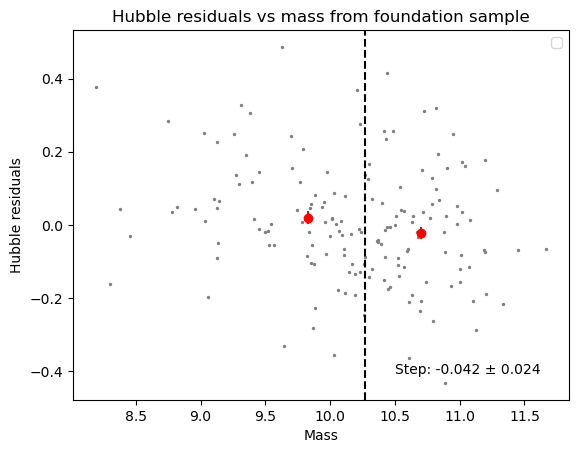

In [27]:

# [mass] weighted average for below median 
massf_values_bm = massf_bm['HR']
massf_weights_bm = massf_bm['HR_err']
massf_wa_bm = weighted_average(massf_values_bm, massf_weights_bm)
print(f"[mass]The weighted average below median is: {massf_wa_bm}")
#weighted average for above median
massf_values_am = massf_am['HR']
massf_weights_am = massf_am['HR_err']
massf_wa_am = weighted_average(massf_values_am, massf_weights_am)
print(f"[mass] The weighted average above median is: {massf_wa_am}")

# [mass] uncertainty for below median
massfbootstrap_bm = create_bootstrap_samples_weighted(massf_bm, 'HR', 'HR_err')
massf_std_bm= np.std(massfbootstrap_bm)
print("[mass] uncertainty for below median data:", massf_std_bm)
#uncertainty for above median
massfbootstrap_am = create_bootstrap_samples_weighted(massf_am, 'HR', 'HR_err')
massf_std_am= np.std(massfbootstrap_am)
print("[mass] uncertainty for above median data:", massf_std_am)

#find corresponding x axis (median)
massfx_bm=massf_bm['LOGMASS']
massf_x_bm= np.median(massfx_bm)
massfx_am=massf_am['LOGMASS']
massf_x_am= np.median(massfx_am)

#extract axis for plot
#y axis for plot
dmuf=dff2['HR']
#x axis for plot
massf= dff2['LOGMASS']

#calculate the difference of hubble residuals
massf_step= massf_wa_am - massf_wa_bm
massf_step_err= np.sqrt((massf_std_am)**2 + (massf_std_bm)**2)
print("[mass] hubble residual diff:", massf_step)
print("[mass] the error of hubble residual diff:", massf_step_err)

#plotting
plt.figure()
plt.scatter(massf,dmuf, s=2, color='gray')
plt.xlabel('Mass')
plt.ylabel('Hubble residuals')
plt.axvline(x=med_massf, color='black', linestyle='--')
plt.errorbar(massf_x_bm , massf_wa_bm, yerr=massf_std_bm, fmt='o', color='red')
plt.errorbar(massf_x_am , massf_wa_am, yerr=massf_std_am, fmt='o', color='red')
plt.title('Hubble residuals vs mass from foundation sample')
# Add legend
plt.legend()
# Add custom text annotation (keterangan)
plt.text(0.65, 0.1, f'Step: {massf_step:.3f} ± {massf_step_err:.3f} ', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
file_path2 = 'hubble_residuals_vs_mass_foundation.png'
# Remove file if it exists
if os.path.isfile(file_path2):
    os.remove(file_path2)
# Save the plot as a PNG file
plt.savefig(file_path2)

OzDES data

In [28]:
#splitting data based on redshift value
z= df_merged['zHD']
q1_z=np.percentile(z, 25)
#q1_z_med=np.median(q1_z)
med_z= np.percentile(z,50)
q3_z=np.percentile(z,75)
#%%
reg1= df_merged[z < q1_z]
reg1_z_med = np.median(reg1['zHD'])
reg2 = df_merged[(z >= q1_z) & (z < med_z)]
reg2_z_med = np.median(reg2['zHD'])
reg3 = df_merged[(z >= med_z) & (z < q3_z)]
reg3_z_med = np.median(reg3['zHD'])
reg4= df_merged[z>=q3_z]
reg4_z_med = np.median(reg4['zHD'])
print(reg1['zHD'])
print(reg2['zHD'])
print(reg3['zHD'])
print(np.min(z), np.min(reg1['zHD']))

#%%
"""Mass"""
#find median of each region
#region 1
mass_z_reg1= reg1['HOST_LOGMASS']
med_mass_z_reg1= med_mass
#split data into two
mass_z_reg1_bm = reg1[mass_z_reg1 <= med_mass]
mass_z_reg1_am = reg1[mass_z_reg1 > med_mass]
#region 2
mass_z_reg2= reg2['HOST_LOGMASS']
med_mass_z_reg2= med_mass
#split data into two
mass_z_reg2_bm = reg2[mass_z_reg2 <= med_mass]
mass_z_reg2_am = reg2[mass_z_reg2 > med_mass]
#region 3
mass_z_reg3= reg3['HOST_LOGMASS']
med_mass_z_reg3= med_mass
#split data into two
mass_z_reg3_bm = reg3[mass_z_reg3 <= med_mass]
mass_z_reg3_am = reg3[mass_z_reg3 > med_mass]
#region 4
mass_z_reg4= reg4['HOST_LOGMASS']
med_mass_z_reg4= med_mass
#split data into two
mass_z_reg4_bm = reg4[mass_z_reg4 <= med_mass]
mass_z_reg4_am = reg4[mass_z_reg4 > med_mass]
print(mass_z_reg4_am)
# %%
#region1
#weighted average for below median 
mass_values_bm_z_reg1 = mass_z_reg1_bm['delta_mu']
mass_weights_bm_z_reg1 = mass_z_reg1_bm['MUERR']
mass_wa_bm_z_reg1 = weighted_average(mass_values_bm_z_reg1, mass_weights_bm_z_reg1)
print(f"[MASS] The weighted average below median for reg1 is: {mass_wa_bm_z_reg1}")
#weighted average for above median
mass_values_am_z_reg1 = mass_z_reg1_am['delta_mu']
mass_weights_am_z_reg1 = mass_z_reg1_am['MUERR']
mass_wa_am_z_reg1 = weighted_average(mass_values_am_z_reg1, mass_weights_am_z_reg1)
print(f"[MASS] The weighted average above median for reg1 is: {mass_wa_am_z_reg1}")
#region2
#weighted average for below median 
mass_values_bm_z_reg2 = mass_z_reg2_bm['delta_mu']
mass_weights_bm_z_reg2 = mass_z_reg2_bm['MUERR']
mass_wa_bm_z_reg2 = weighted_average(mass_values_bm_z_reg2, mass_weights_bm_z_reg2)
print(f"[MASS] The weighted average below median for reg2 is: {mass_wa_bm_z_reg2}")
#weighted average for above median
mass_values_am_z_reg2 = mass_z_reg2_am['delta_mu']
mass_weights_am_z_reg2 = mass_z_reg2_am['MUERR']
mass_wa_am_z_reg2 = weighted_average(mass_values_am_z_reg2, mass_weights_am_z_reg2)
print(f"[MASS] The weighted average above median for reg2 is: {mass_wa_am_z_reg2}")
#region3
#weighted average for below median 
mass_values_bm_z_reg3 = mass_z_reg3_bm['delta_mu']
mass_weights_bm_z_reg3 = mass_z_reg3_bm['MUERR']
mass_wa_bm_z_reg3 = weighted_average(mass_values_bm_z_reg3, mass_weights_bm_z_reg3)
print(f"[MASS] The weighted average below median for reg3 is: {mass_wa_bm_z_reg3}")
#weighted average for above median
mass_values_am_z_reg3 = mass_z_reg3_am['delta_mu']
mass_weights_am_z_reg3 = mass_z_reg3_am['MUERR']
mass_wa_am_z_reg3 = weighted_average(mass_values_am_z_reg3, mass_weights_am_z_reg3)
print(f"[MASS] The weighted average above median for reg3 is: {mass_wa_am_z_reg3}")
#region4
#weighted average for below median 
mass_values_bm_z_reg4 = mass_z_reg4_bm['delta_mu']
mass_weights_bm_z_reg4 = mass_z_reg4_bm['MUERR']
mass_wa_bm_z_reg4 = weighted_average(mass_values_bm_z_reg4, mass_weights_bm_z_reg4)
print(f"[MASS] The weighted average below median for reg4 is: {mass_wa_bm_z_reg4}")
#weighted average for above median
mass_values_am_z_reg4 = mass_z_reg4_am['delta_mu']
mass_weights_am_z_reg4 = mass_z_reg4_am['MUERR']
mass_wa_am_z_reg4 = weighted_average(mass_values_am_z_reg4, mass_weights_am_z_reg4)
print(f"[MASS] The weighted average above median for reg4 is: {mass_wa_am_z_reg4}")
# %%
print(mass_weights_bm_z_reg1)
#%%
#region1
#uncertainty for below median
mass_bootstrap_bm_z_reg1 = create_bootstrap_samples_weighted(mass_z_reg1_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg1= np.std(mass_bootstrap_bm_z_reg1)
intrinsic_error_bm_z_reg1= intrinsic_error(mass_z_reg1_bm['MUERR'].values)
#%%
print("[MASS] uncertainty for below median for reg1 data:", mass_std_bm_z_reg1)
#%%
#uncertainty for above median
mass_bootstrap_am_z_reg1= create_bootstrap_samples_weighted(mass_z_reg1_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg1= np.std(mass_bootstrap_am_z_reg1)
intrinsic_error_am_z_reg1= intrinsic_error(mass_z_reg1_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg1 data:", mass_std_am_z_reg1)
#region2
#uncertainty for below median
mass_bootstrap_bm_z_reg2 = create_bootstrap_samples_weighted(mass_z_reg2_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg2= np.std(mass_bootstrap_bm_z_reg2)
intrinsic_error_bm_z_reg2= intrinsic_error(mass_z_reg2_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg2 data:", mass_std_bm_z_reg2)
#uncertainty for above median
mass_bootstrap_am_z_reg2= create_bootstrap_samples_weighted(mass_z_reg2_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg2= np.std(mass_bootstrap_am_z_reg2)
intrinsic_error_am_z_reg2= intrinsic_error(mass_z_reg2_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg2 data:", mass_std_am_z_reg2)
#region3
#uncertainty for below median
mass_bootstrap_bm_z_reg3 = create_bootstrap_samples_weighted(mass_z_reg3_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg3= np.std(mass_bootstrap_bm_z_reg3)
intrinsic_error_bm_z_reg3= intrinsic_error(mass_z_reg3_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg3 data:", mass_std_bm_z_reg3)
#uncertainty for above median
mass_bootstrap_am_z_reg3= create_bootstrap_samples_weighted(mass_z_reg3_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg3= np.std(mass_bootstrap_am_z_reg3)
intrinsic_error_am_z_reg3= intrinsic_error(mass_z_reg3_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg3 data:", mass_std_am_z_reg3)
#region4
#uncertainty for below median
mass_bootstrap_bm_z_reg4 = create_bootstrap_samples_weighted(mass_z_reg4_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg4= np.std(mass_bootstrap_bm_z_reg4)
intrinsic_error_bm_z_reg4= intrinsic_error(mass_z_reg4_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg4 data:", mass_std_bm_z_reg4)
#uncertainty for above median
mass_bootstrap_am_z_reg4= create_bootstrap_samples_weighted(mass_z_reg4_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg4= np.std(mass_bootstrap_am_z_reg4)
intrinsic_error_am_z_reg4= intrinsic_error(mass_z_reg4_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg4 data:", mass_std_am_z_reg4)
# %%
#calculate the difference of hubble residuals
#region1
mass_step_z_reg1= mass_wa_am_z_reg1 - mass_wa_bm_z_reg1
mass_step_err_z_reg1= np.sqrt((mass_std_am_z_reg1)**2 + (mass_std_bm_z_reg1)**2)
intrin_step_err_z_reg1= np.sqrt((intrinsic_error_am_z_reg1)**2 + (intrinsic_error_bm_z_reg1)**2)
print("[MASS] hubble residual diff for reg1:", mass_step_z_reg1, "with redshift=", reg1_z_med )
print("[MASS] the error of hubble residual diff for reg1:", mass_step_err_z_reg1)
print("[MASS] the intrinsic error of hubble residual diff for reg1:", intrin_step_err_z_reg1)
#region2
mass_step_z_reg2= mass_wa_am_z_reg2 - mass_wa_bm_z_reg2
mass_step_err_z_reg2= np.sqrt((mass_std_am_z_reg2)**2 + (mass_std_bm_z_reg2)**2)
intrin_step_err_z_reg2= np.sqrt((intrinsic_error_am_z_reg2)**2 + (intrinsic_error_bm_z_reg2)**2)
print("[MASS] hubble residual diff for reg2:", mass_step_z_reg2, "with redshift=", reg2_z_med )
print("[MASS] the error of hubble residual diff for reg2", mass_step_err_z_reg2)
print("[MASS] the intrinsic error of hubble residual diff for reg2:", intrin_step_err_z_reg2)
#region3
mass_step_z_reg3= mass_wa_am_z_reg3 - mass_wa_bm_z_reg3
mass_step_err_z_reg3= np.sqrt((mass_std_am_z_reg3)**2 + (mass_std_bm_z_reg3)**2)
intrin_step_err_z_reg3= np.sqrt((intrinsic_error_am_z_reg3)**2 + (intrinsic_error_bm_z_reg3)**2)
print("[MASS] hubble residual diff for reg3:", mass_step_z_reg3, "with redshift=", reg3_z_med )
print("[MASS] the error of hubble residual diff for reg3:", mass_step_err_z_reg3)
print("[MASS] the intrinsic error of hubble residual diff for reg3:", intrin_step_err_z_reg3)
#region4
mass_step_z_reg4= mass_wa_am_z_reg4 - mass_wa_bm_z_reg4
mass_step_err_z_reg4= np.sqrt((mass_std_am_z_reg4)**2 + (mass_std_bm_z_reg4)**2)
intrin_step_err_z_reg4= np.sqrt((intrinsic_error_am_z_reg4)**2 + (intrinsic_error_bm_z_reg4)**2)
print("[MASS] hubble residual diff for reg4:", mass_step_z_reg4, "with redshift=", reg4_z_med )
print("[MASS] the error of hubble residual diff for reg4", mass_step_err_z_reg4)
print("[MASS] the intrinsic error of hubble residual diff for reg4:", intrin_step_err_z_reg4)

9      0.36101
10     0.26150
17     0.17267
30     0.16008
34     0.35723
        ...   
671    0.29376
672    0.27905
674    0.21711
685    0.31042
692    0.31251
Name: zHD, Length: 174, dtype: float64
1      0.38884
3      0.42420
7      0.49412
13     0.48417
14     0.52790
        ...   
677    0.45944
679    0.47273
683    0.39365
691    0.51197
694    0.38683
Name: zHD, Length: 173, dtype: float64
0      0.57618
4      0.58141
8      0.58627
12     0.54947
15     0.62162
        ...   
682    0.60874
684    0.61935
687    0.58936
689    0.55145
690    0.63502
Name: zHD, Length: 174, dtype: float64
0.05962 0.05962
    VARNAMES:      CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  \
2         SN:  1309227  1309227        10     0    C3              3   
5         SN:  1833468  1833468        10     0    X3              3   
6         SN:  1338718  1338718        10     0    S1              3   
11        SN:  1339246  1339246        10     0    C3              3   
28        SN

References data

In [29]:
#extract plot from referenes
filepath3 = 'childress.csv'
df3 = pd.read_csv(filepath3)
df3.head()
#%%
filepath4='data2-1.csv'
df4=pd.read_csv(filepath4)
df4.head()
#%%
filepath5='4bins.csv'
df5=pd.read_csv(filepath5)
df5.head()
#%%
print(mass_step)

0.06322115837524528


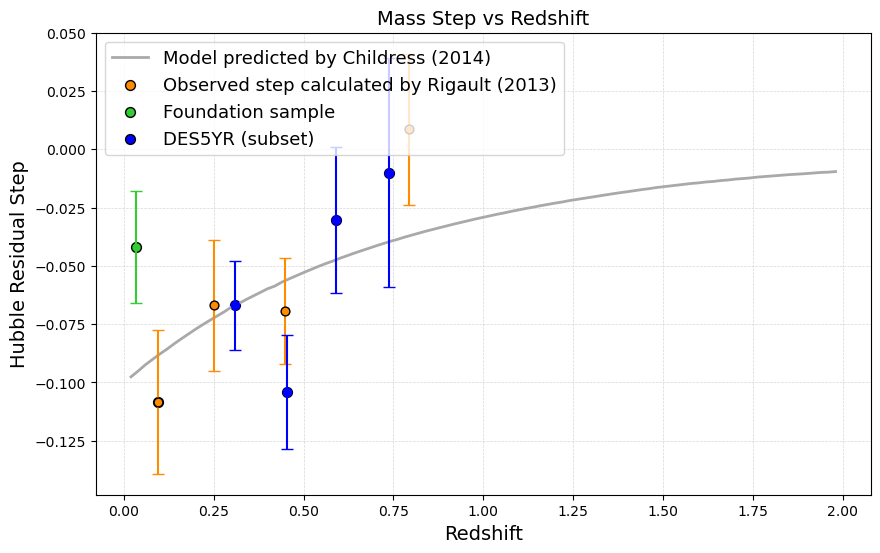

In [35]:
plt.figure(figsize=(10, 6))

# Plotting the model prediction
plt.plot(df3['x'], df3['y'], label=r'Model predicted by Childress (2014)', color='darkgray', linewidth=2)

# Plotting the observed steps from Rigault (2013)
for index in range(len(df5)):
    plt.scatter(df5.iloc[index]['x'], df5.iloc[index]['y'], color='darkorange', s=40, edgecolor='black', zorder=5)
    plt.errorbar(df5.iloc[index]['x'], df5.iloc[index]['y'], yerr=[0.03079710144, 0.02820048309, 0.022705314, 0.03242753623][index], 
                 color='darkorange', capsize=4)

# Adding the legend for the orange data
plt.scatter(df5.iloc[0]['x'], df5.iloc[0]['y'], color='darkorange', label=r'Observed step calculated by Rigault (2013)', s=50, edgecolor='black')

# Plotting the foundation sample
plt.scatter(med_redshift, massf_step, color='limegreen', label=r'Foundation sample', s=50, edgecolor='black')
plt.errorbar(med_redshift, massf_step, yerr=massf_step_err, color='limegreen', capsize=4)

# Plotting OzDES data
ozdes_data = [(reg1_z_med, mass_step_z_reg1), (reg2_z_med, mass_step_z_reg2), 
              (reg3_z_med, mass_step_z_reg3), (reg4_z_med, mass_step_z_reg4)]
for z_med, mass_step_z in ozdes_data:
    plt.scatter(z_med, mass_step_z, color='blue', s=50, edgecolor='black', label=r'DES5YR (subset)' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, mass_step_z, yerr=[mass_step_err_z_reg1, mass_step_err_z_reg2, mass_step_err_z_reg3, mass_step_err_z_reg4][ozdes_data.index((z_med, mass_step_z))], 
                 fmt='o', color='blue', capsize=4)

# Labels and title
plt.xlabel(r'Redshift', fontsize=14)
plt.ylabel(r'Hubble Residual Step', fontsize=14)
plt.title(r'Mass Step vs Redshift', fontsize=14)

# Grid and legend
plt.grid(alpha=0.5, linestyle='--', linewidth=0.5)
plt.legend(fontsize=13, loc='upper left')

# File saving process
file_pathz1 = 'mass_step_vs_redshift.png'
if os.path.isfile(file_pathz1):
    os.remove(file_pathz1)

# Save the plot as a PNG file
plt.savefig(file_pathz1, bbox_inches='tight', dpi=300)
plt.show()  # Show the plot